# Sleep Data Analysis
Fitness bands are wristbands that are used to monitor and track fitness-related metrics. They help in tracking sleep, calories spent/burnt, distance walked, monitoring heart rate, and other activities. Here, we'll be using personal Mi Band dataset obtained from www.huami.com and analyzing it to track sleep and steps patterns. 
The libraries for data analysis and visualization used in this project are Numpy, Pandas, Matplotlib and Seaborn. These libraries are covered in the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Uploading the Dataset
 
The dataset used has been manually extrated from MI Band 4.
>The 2 csv files used contain data from 01-01-2019 to 13-09-2020
- 1)Sleep data
- 2)Steps data

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 '11814057_SOURABH ROHILLA_EE.pdf',
 'adobe photoshop',
 'ans1.txt',
 'Atom.lnk',
 'CONVOCATION.docx',
 'courses.txt',
 'desktop.ini',
 'Dev-C++.lnk',
 'energy storage systems in modern power system.docx',
 'htmlcheatsheet.pdf',
 'hyperverge.docx',
 'matlab - Shortcut.lnk',
 'Microsoft Edge.lnk',
 'New Doc 2020-01-23 17.25.51.pdf',
 'New folder',
 'New Text Document (2).txt',
 'New Text Document.txt',
 'OpenOffice 4.1.4 (en-US) Installation Files',
 'PopSQL.lnk',
 'PSIM_2020a.lnk',
 'sleep mod.csv',
 'sleep mod2.csv',
 'Sleep Project',
 'sleep.csv',
 'sleep_data_analysis.ipynb',
 "Sourabh's  RESUME DA.pdf",
 'The President of India.docx',
 'udemy certi.pdf',
 'udemy certi1.pdf',
 'Untitled.ipynb',
 'Untitled3.m',
 'uTorrent Web.lnk',
 'Visual Studio Code.lnk',
 'web Development',
 '~$ergy storage systems in modern power system.docx',
 '~$horeo1.docx']

Importing all the required libraries-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

Let's begin by loading the data and storing it in datasets.

In [3]:
#import sleep data
sleep_df=pd.read_csv('F:\download\SLEEP.csv')
#import steps data
steps_df=pd.read_csv('F:\download\STEPS.csv')

The dataset has been loaded and extracted.

In [4]:
sleep_df

,date,lastSyncTime,deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,2019-01-01,1546398020,102,263,0,1546287420,1546309320
1,2019-01-02,1546453935,107,322,0,1546362360,1546388100
2,2019-01-03,1546540571,31,375,0,1546458600,1546482960
3,2019-01-04,1546626774,41,403,0,1546542180,1546568820
4,2019-01-05,1546713197,72,509,0,1546626660,1546661520
...,...,...,...,...,...,...,...
611,2020-09-09,1599677043,62,399,0,1599593160,1599620820
612,2020-09-10,1599763807,75,447,45,1599679980,1599714000
613,2020-09-11,1599850084,107,326,0,1599774900,1599800880
614,2020-09-12,1599936068,80,388,0,1599860400,1599888480


In [5]:
steps_df

,date,lastSyncTime,steps,distance,runDistance,calories
0,2019-01-01,1546398020,16814,11586,457,363
1,2019-01-02,1546453935,18661,13175,1873,453
2,2019-01-03,1546540571,17968,12456,720,399
3,2019-01-04,1546626774,14702,10313,909,342
4,2019-01-05,1546713197,20001,13676,657,421
...,...,...,...,...,...,...
611,2020-09-09,1599677043,2196,1436,216,48
612,2020-09-10,1599763807,2178,1424,194,50
613,2020-09-11,1599850084,1799,1177,113,43
614,2020-09-12,1599936068,3594,2363,222,78


## Data Preparation and Cleaning

> - The raw data obtained contains all the required values but is __not optimised for processing and analysing.__
> - The following steps include __cleansing, merging and sorting the data to be used for visualisation.__


Some dates have zero values because the band was not worn by the user, deleting such values...

In [6]:
#removing zero values
nonzero = sleep_df[sleep_df.shallowSleepTime != 0]

Creating and inserting a __total sleep column.__

In [7]:
#creating and inserting total sleep column
total_sleep=  nonzero[['deepSleepTime', 'shallowSleepTime']].sum(axis=1)
nonzero.insert(2, 'totalSleep', total_sleep)
#reseting index
true_df=nonzero.reset_index()

__Merging sleep and steps dataframes.__

In [8]:
#merging df on 'date' column
merged_df = true_df.merge(steps_df, on="date")

Spliting the date column to get values such as month, day of the week, year etc. in different columns which can then be used for analysis.

In [9]:
#Split date
merged_df[["year", "mm", "day"]] = merged_df["date"].str.split("-", expand=True)

#month from int to word
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
            '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

merged_df['month'] = merged_df['mm'].apply(lambda x: look_up[x])

#day of week
merged_df['Date'] = pd.to_datetime(merged_df['date'])
merged_df['day_of_week'] = merged_df['Date'].dt.day_name()

The __start and stop values are given as epoch units__ in dataset, converting them to simplified datetime stamps

In [10]:
#changing epoch time to IST time zone(offset seconds)
merged_df['start']+=19800
merged_df['stop']+=19800

#start epoch time to datestamp
start_df = pd.to_datetime(merged_df['start'], unit='s')
#stop epoch time to datestamp
stop_df=pd.to_datetime(merged_df['stop'], unit='s')

#inserting values
merged_df['startTime']=start_df.dt.strftime('%H:%M')
merged_df['stopTime']=stop_df.dt.strftime('%H:%M')

Adding more useful columns to dataframe-

In [11]:
#Sleep Efficency column- Deep sleep/Total Sleep
merged_df['ratio']=merged_df['deepSleepTime']/merged_df['totalSleep']

#bed and wake times in decimal(for graphing)
merged_df['bedtime'] = start_df.dt.hour + start_df.dt.minute / 60.0
merged_df['waketime'] = stop_df.dt.hour + stop_df.dt.minute / 60.0


In [12]:
merged_df

,index,date,lastSyncTime_x,totalSleep,deepSleepTime,shallowSleepTime,wakeTime,start,stop,lastSyncTime_y,...,mm,day,month,Date,day_of_week,startTime,stopTime,ratio,bedtime,waketime
0,0,2019-01-01,1546398020,365,102,263,0,1546307220,1546329120,1546398020,...,01,01,Jan,2019-01-01,Tuesday,01:47,07:52,0.279452,1.783333,7.866667
1,1,2019-01-02,1546453935,429,107,322,0,1546382160,1546407900,1546453935,...,01,02,Jan,2019-01-02,Wednesday,22:36,05:45,0.249417,22.600000,5.750000
2,2,2019-01-03,1546540571,406,31,375,0,1546478400,1546502760,1546540571,...,01,03,Jan,2019-01-03,Thursday,01:20,08:06,0.076355,1.333333,8.100000
3,3,2019-01-04,1546626774,444,41,403,0,1546561980,1546588620,1546626774,...,01,04,Jan,2019-01-04,Friday,00:33,07:57,0.092342,0.550000,7.950000
4,4,2019-01-05,1546713197,581,72,509,0,1546646460,1546681320,1546713197,...,01,05,Jan,2019-01-05,Saturday,00:01,09:42,0.123924,0.016667,9.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,611,2020-09-09,1599677043,461,62,399,0,1599612960,1599640620,1599677043,...,09,09,Sep,2020-09-09,Wednesday,00:56,08:37,0.134490,0.933333,8.616667
583,612,2020-09-10,1599763807,522,75,447,45,1599699780,1599733800,1599763807,...,09,10,Sep,2020-09-10,Thursday,01:03,10:30,0.143678,1.050000,10.500000
584,613,2020-09-11,1599850084,433,107,326,0,1599794700,1599820680,1599850084,...,09,11,Sep,2020-09-11,Friday,03:25,10:38,0.247113,3.416667,10.633333
585,614,2020-09-12,1599936068,468,80,388,0,1599880200,1599908280,1599936068,...,09,12,Sep,2020-09-12,Saturday,03:10,10:58,0.170940,3.166667,10.966667


Removing unnecessary columns-

In [13]:
#removing columns
merged_df=merged_df.drop(['index', 'lastSyncTime_x', 'lastSyncTime_y','start','stop','wakeTime','runDistance','calories'], axis = 1);
#rearraning columns
merged_df=merged_df[['Date','day_of_week','totalSleep','deepSleepTime','shallowSleepTime','startTime','stopTime','steps','distance','ratio','year','mm','month','day','bedtime','waketime']]
merged_df

,Date,day_of_week,totalSleep,deepSleepTime,shallowSleepTime,startTime,stopTime,steps,distance,ratio,year,mm,month,day,bedtime,waketime
0,2019-01-01,Tuesday,365,102,263,01:47,07:52,16814,11586,0.279452,2019,01,Jan,01,1.783333,7.866667
1,2019-01-02,Wednesday,429,107,322,22:36,05:45,18661,13175,0.249417,2019,01,Jan,02,22.600000,5.750000
2,2019-01-03,Thursday,406,31,375,01:20,08:06,17968,12456,0.076355,2019,01,Jan,03,1.333333,8.100000
3,2019-01-04,Friday,444,41,403,00:33,07:57,14702,10313,0.092342,2019,01,Jan,04,0.550000,7.950000
4,2019-01-05,Saturday,581,72,509,00:01,09:42,20001,13676,0.123924,2019,01,Jan,05,0.016667,9.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2020-09-09,Wednesday,461,62,399,00:56,08:37,2196,1436,0.134490,2020,09,Sep,09,0.933333,8.616667
583,2020-09-10,Thursday,522,75,447,01:03,10:30,2178,1424,0.143678,2020,09,Sep,10,1.050000,10.500000
584,2020-09-11,Friday,433,107,326,03:25,10:38,1799,1177,0.247113,2020,09,Sep,11,3.416667,10.633333
585,2020-09-12,Saturday,468,80,388,03:10,10:58,3594,2363,0.170940,2020,09,Sep,12,3.166667,10.966667


Sorting dataframes, because __2020 data is rigged due to covid, most analysis is done on 2019 dataset.__

In [14]:
#2019 df
df_2019=merged_df[merged_df.year == '2019']
#2020 df
df_2020=merged_df[merged_df.year == '2020']
#day_df
day_df=df_2019.groupby('day_of_week').mean()
day_df = day_df.reset_index()
day_df=day_df[['day_of_week','totalSleep']]
day_df=day_df.reindex([1,5,6,4,0,2,3])

In [15]:
df_2019

,Date,day_of_week,totalSleep,deepSleepTime,shallowSleepTime,startTime,stopTime,steps,distance,ratio,year,mm,month,day,bedtime,waketime
0,2019-01-01,Tuesday,365,102,263,01:47,07:52,16814,11586,0.279452,2019,01,Jan,01,1.783333,7.866667
1,2019-01-02,Wednesday,429,107,322,22:36,05:45,18661,13175,0.249417,2019,01,Jan,02,22.600000,5.750000
2,2019-01-03,Thursday,406,31,375,01:20,08:06,17968,12456,0.076355,2019,01,Jan,03,1.333333,8.100000
3,2019-01-04,Friday,444,41,403,00:33,07:57,14702,10313,0.092342,2019,01,Jan,04,0.550000,7.950000
4,2019-01-05,Saturday,581,72,509,00:01,09:42,20001,13676,0.123924,2019,01,Jan,05,0.016667,9.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2019-12-27,Friday,483,86,397,00:26,08:29,20113,13694,0.178054,2019,12,Dec,27,0.433333,8.483333
332,2019-12-28,Saturday,526,44,482,23:55,08:41,8725,5736,0.083650,2019,12,Dec,28,23.916667,8.683333
333,2019-12-29,Sunday,624,110,514,23:26,09:50,5865,3920,0.176282,2019,12,Dec,29,23.433333,9.833333
334,2019-12-30,Monday,556,80,476,01:22,10:41,4728,3168,0.143885,2019,12,Dec,30,1.366667,10.683333


In [16]:
df_2020

,Date,day_of_week,totalSleep,deepSleepTime,shallowSleepTime,startTime,stopTime,steps,distance,ratio,year,mm,month,day,bedtime,waketime
336,2020-01-01,Wednesday,559,89,470,01:30,10:49,5491,3828,0.159213,2020,01,Jan,01,1.500000,10.816667
337,2020-01-02,Thursday,659,68,591,01:16,12:15,9362,6149,0.103187,2020,01,Jan,02,1.266667,12.250000
338,2020-01-03,Friday,441,73,368,03:10,10:31,5960,4118,0.165533,2020,01,Jan,03,3.166667,10.516667
339,2020-01-04,Saturday,426,83,343,04:55,12:01,6931,4615,0.194836,2020,01,Jan,04,4.916667,12.016667
340,2020-01-05,Sunday,539,57,482,23:20,09:05,7283,4975,0.105751,2020,01,Jan,05,23.333333,9.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2020-09-09,Wednesday,461,62,399,00:56,08:37,2196,1436,0.134490,2020,09,Sep,09,0.933333,8.616667
583,2020-09-10,Thursday,522,75,447,01:03,10:30,2178,1424,0.143678,2020,09,Sep,10,1.050000,10.500000
584,2020-09-11,Friday,433,107,326,03:25,10:38,1799,1177,0.247113,2020,09,Sep,11,3.416667,10.633333
585,2020-09-12,Saturday,468,80,388,03:10,10:58,3594,2363,0.170940,2020,09,Sep,12,3.166667,10.966667


In [17]:
day_df

,day_of_week,totalSleep
1,Monday,442.479167
5,Tuesday,445.666667
6,Wednesday,441.836735
4,Thursday,428.714286
0,Friday,450.702128
2,Saturday,507.425532
3,Sunday,487.416667


## Exploratory Analysis and Visualization

>Tinkering around with the data led to some useful insights and helped to get comfortable with the dataframes. Some interesting explorations are listed below which were then improved upon to find answers of real world questions.



In [18]:
merged_df.shape

(587, 16)

In [19]:
merged_df.dtypes

Date                datetime64[ns]
day_of_week                 object
totalSleep                   int64
deepSleepTime                int64
shallowSleepTime             int64
startTime                   object
stopTime                    object
steps                        int64
distance                     int64
ratio                      float64
year                        object
mm                          object
month                       object
day                         object
bedtime                    float64
waketime                   float64
dtype: object

In [20]:
df_2019.describe()

,totalSleep,deepSleepTime,shallowSleepTime,steps,distance,ratio,bedtime,waketime
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,457.488095,69.303571,388.184524,7806.357143,5280.976190,0.155599,5.213790,9.142708
std,118.040139,30.327911,106.349025,4711.752720,3250.108942,0.069839,7.790261,1.671025
min,71.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.083333
25%,382.000000,46.000000,320.000000,4341.750000,2877.750000,0.111831,1.100000,8.100000
50%,468.000000,67.000000,403.500000,6544.500000,4376.500000,0.150156,2.025000,9.375000
75%,540.000000,89.000000,460.250000,10615.000000,7185.500000,0.194698,3.754167,10.233333
max,746.000000,166.000000,679.000000,22748.000000,15631.000000,0.589041,23.966667,13.316667


In [21]:
df_2020.describe()

,totalSleep,deepSleepTime,shallowSleepTime,steps,distance,ratio,bedtime,waketime
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,485.000000,74.410359,410.589641,4578.868526,3062.330677,0.154039,5.381939,9.301394
std,77.069838,29.355118,72.380183,3260.378802,2241.871741,0.056531,8.328838,1.236328
min,220.000000,10.000000,149.000000,668.000000,439.000000,0.016313,0.000000,6.033333
25%,443.000000,52.500000,367.000000,2409.500000,1576.000000,0.117389,0.875000,8.425000
50%,493.000000,76.000000,414.000000,3591.000000,2348.000000,0.155722,1.566667,9.583333
75%,539.000000,96.000000,452.000000,5787.000000,3849.000000,0.194998,3.400000,10.233333
max,659.000000,144.000000,603.000000,25655.000000,17333.000000,0.322727,23.983333,12.250000


Evidently, __average total sleep is greater by 28 minutes in 2020__ because of home stay and the __average distance travelled is less in 2020 by about 2 KM because of lockdown due to the pandemic.__

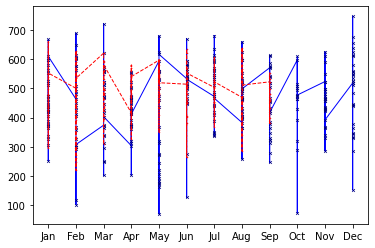

In [22]:
# First line
plt.plot(df_2019['month'], df_2019['totalSleep'], 'b-x', linewidth=1, markersize=0.5, markeredgewidth=4, markeredgecolor='navy')

# Second line
plt.plot(df_2020['month'], df_2020['totalSleep'], 'r--o', linewidth=1, markersize=0.5,);


The scatter in sleep duration of 2020(red) is less than that of 2019(blue) but a better representation can be shown.

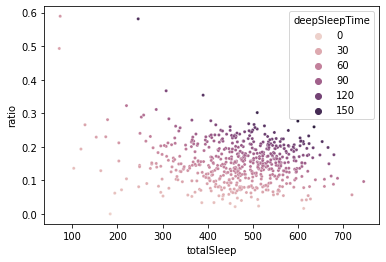

In [23]:
sns.scatterplot(data=merged_df,x='totalSleep', # X-axis
                y='ratio',  # Y-axis
                hue='deepSleepTime',
                s=10);

Some relations can be established but using another model will clearly inform the inferences.

## Asking and Answering Questions
> - Here are some real world questions that can be asked from the data.
> - Interesting visualisations that help us answer the questions are presented.
> - Final answer statement(with justification) to the problem presented.




### Q1:What is the frequency of sleep duration? 

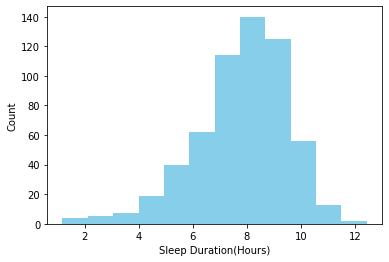

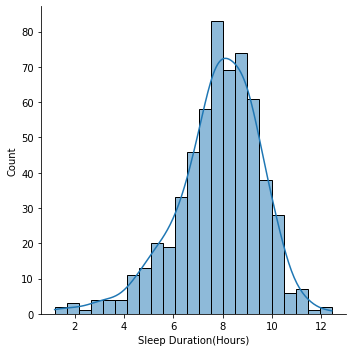

In [24]:
#sleep time in integer
merged_df['sleephour']=merged_df['totalSleep']/60
#making df for sleep hr
df = pd.DataFrame(merged_df.sleephour, index = None)
#2nd plot
x=df.sleephour
plt.hist(x, bins =12,color='skyblue')
plt.xlabel('Sleep Duration(Hours)'); plt.ylabel('Count');
ax=sns.displot(data=x, x=x,palette="Blues", kde=True,)
ax.set(xlabel="Sleep Duration(Hours)", ylabel = "Count");

From the above normal distribution curve, we can easily conclude that the __maximum frequency of sleep duration is between 7.5-9 hours.__

### Q2: What is the variation of sleep duration w.r.t. to days of the week?

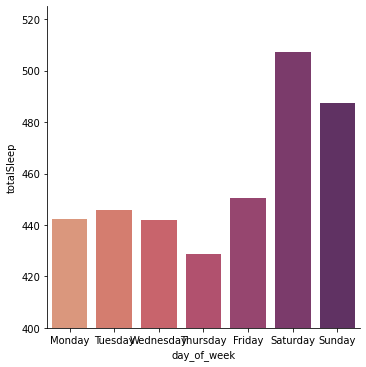

In [25]:
ax=sns.catplot(data=day_df, kind="bar", x="day_of_week", y="totalSleep",palette="flare");
ax.set(ylim=(400, 525));

Thursday was found to be the most sleep deprived day while the sleep time was maximum on Saturday.

### Q3: During which month was the average step count  minimum and maximum?

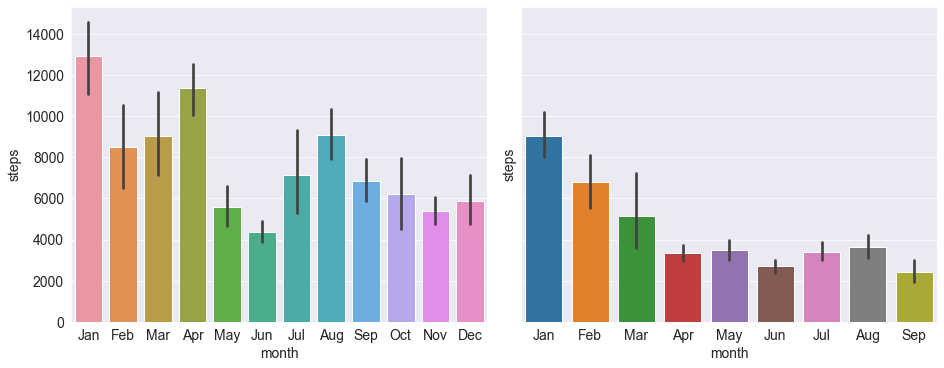

In [26]:
#configuring graph styles
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (13, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

#plotting 2 graphs on same axis
fig, axs = plt.subplots(ncols=2, nrows=1, constrained_layout=True,sharey=True)
sns.barplot(data=df_2019, x="month", y="steps", ax=axs[0])
sns.barplot(data=df_2020, x="month", y="steps", ax=axs[1]);


- For 2019’s data, the steps were __minimum in June while the maximum step count was in January.__ This was due to advent of exams and summer vacations.
- For 2020’s data, the steps __were maximum in January.__ After viewing the above graphs we can easily conclude that the daily step count has significantly declined from 2019 to 2020 due to the COVID-19 on-going situation. Due to lockdown, there is rapid decrease in the physical activity.

### Q4: Which month has the lowest sleep time?

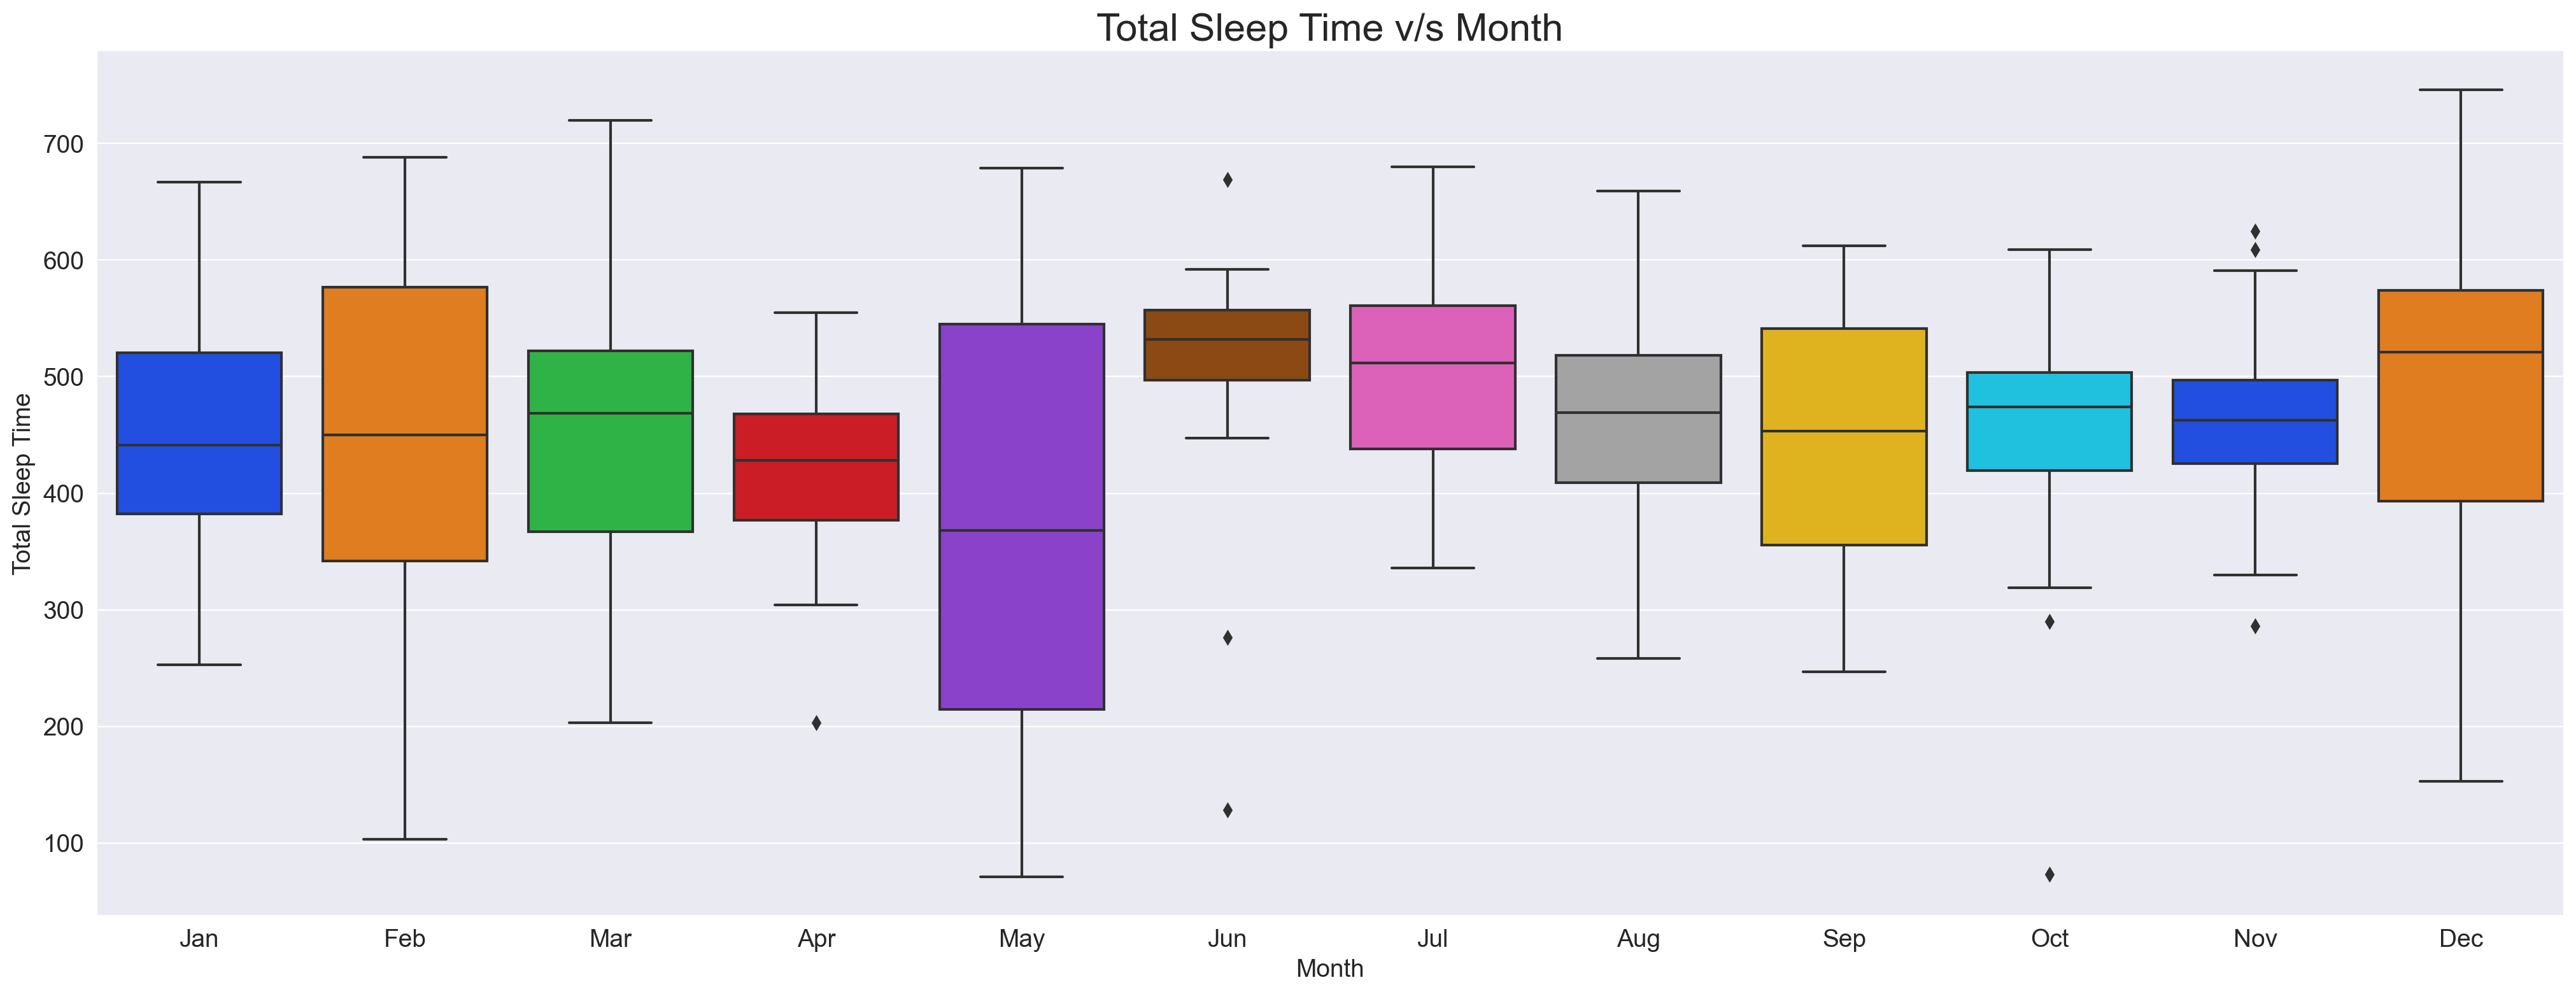

In [27]:
# Draw Plot
plt.figure(figsize=(25,9), dpi= 200)
sns.boxplot(x='month', y='totalSleep',palette='bright', data=df_2019)

# Decoration
plt.title('Total Sleep Time v/s Month', fontsize=22)
plt.xlabel('Month'); plt.ylabel('Total Sleep Time');
plt.show()

On visualizing we found out that the month of __May has the lowest sleep time.__ The reason being end semester examinations in the college. It has the most wide sleep time pattern i.e. some days the sleep time was less than 4 hours while for other days the sleep time was up to 11 hours.


### Q5: What is the relation between total deep sleep time and the step count for a particular day?

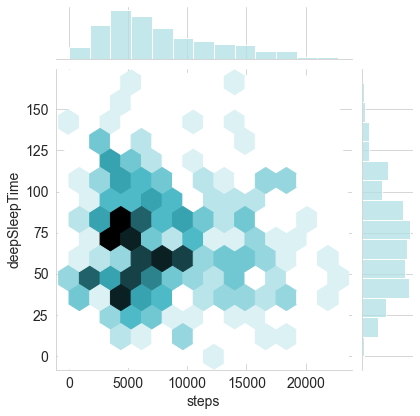

In [28]:
sns.set_style('whitegrid')
sns.jointplot(data=df_2019, x="steps",y="deepSleepTime",color='powderblue',kind="hex");

After plotting the graph between the total deep sleep and the total sleep count, it is discovered that there is __no such solid relationship between the two.__

### Q6: Does the bedtime vary in different months of the year?

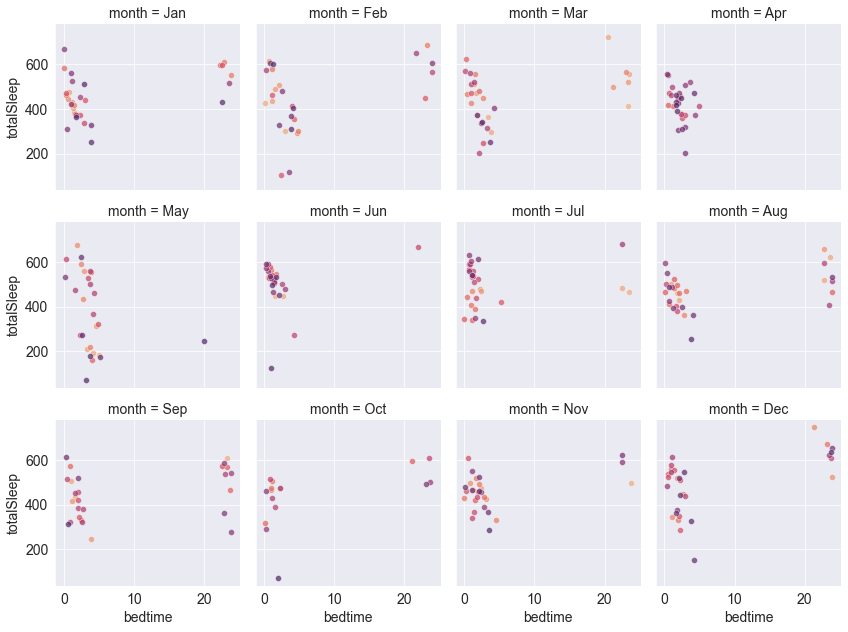

In [29]:
sns.set_style("darkgrid")
g = sns.FacetGrid(df_2019, col="month",col_wrap= 4 ,palette='flare',hue="ratio")
g.map(sns.scatterplot, "bedtime", "totalSleep", alpha=.7);

- __Yes__, according to the graphs obtained there is a variation in time to go to bed for different months. It can be justified on the basis of different seasons like in winters the bedtime frequency is more close to 12 A.M. while in summers the bedtime frequency is somewhat scattered.
- The __sleep efficiency also increases when the sleep time is regular__, as seen in month of __April & June.__

### Q7: Is there any relation between the sleep efficiency and the total sleep time?

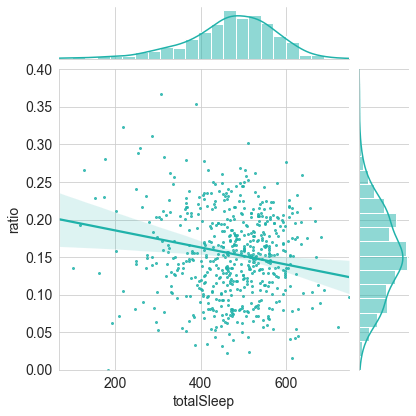

In [30]:
sns.set_style('whitegrid')
ax=sns.jointplot(data=merged_df, x="totalSleep",y="ratio",
                 color='lightseagreen',ylim=(0,0.4),kind="reg",scatter_kws={'s': 4});

According to the regression plot above, it is clearly visible that the sleep efficiency (deep sleep/total sleep) decreases with the increase in total sleep time. While it is maximum when total sleep is around 8 hours.

## Inferences and Conclusion

After visualisation and analysis of both the datasets we finally concluded that the __average sleep time lies between 7.5-8.5 hours__ whereas the __average step count is around 7000__. __May__ is the most sleep deprived month while __June__ is the month with highest sleep. The __average step count was highest in January__ so it the most active month while it was __lowest in June__ because of the summer break. Further, it is evident that COVID-19 pandemic has lead to a significant decrease in total steps taken in a day. This clearly depicts the impact of current ongoing situation of lockdowns. Also due to COVID-19 the average sleep has increased. __Sleep efficiency has a direct correlation with regularity of sleeping time.__ Last but not the least it was discovered that the __sleep efficiency decreases with increase in total sleep time after 8 hrs.__

### References and Future Work

- Github, Stackoverflow and other sources like https://seaborn.pydata.org/ really helped a lot in learning about data analysis.
I have tried my level best to use all the graph functions to achieve and depict variation of the above data frame. Also the conclusions derived were thoroughly discussed and checked to deal with discrepancies.
- With improvements in technology, there will be an addition in data collection like calories intake and calories spent. Also data like location and path travelled can also be included in data set which will lead to more accurate analysis and development of solutions to help us improve our daily life.
- This project has been done in collaboration with [Yatharth Chawla](https://jovian.ml/yatharth-11817042).

Saving the file...

In [34]:
!pip install jovian --upgrade --quiet
import jovian


In [ ]:
project_name='Sleep_Analysis'
jovian.commit(project=project_name, privacy='public', evironment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
